<b><font size=20, color='#A020F0'>Class Notebook 3</font></b>

## Welcome to your third in-class jupyter notebook activity!
In this notebook you'll get more practice with pandas. We'll be using data from the [Survey of Earned Doctorates](https://www.nsf.gov/statistics/srvydoctorates/), an annual survey sponsored by the National Science Foundation, the National Institutes of Health, the Department of Education, and National Endowment for the Humanities. The SED collects information on how many doctorates were earned in a given year, the field in which they were earned, and demographic information on the recipients. We will also be using demographic data from the [U.S. Census Bureau](https://www.census.gov/).

---

<b><font color='red'>Due Date: 7 October 2024 @ 9 am</font></b><br>

<b>How you will turn in this assignment</b><br> When you are ready to turn in your notebook, do the following:
1. Save your notebook and make sure your results are visible (cells have been executed)
2. Open a terminal and navigate to your local `aos573_completed_assignments` repository
3. Move your completed in-class notebook into your `Class_Notebooks` directory
4. `add` and `commit` your completed notebook
5. Finally, `push` your changes to your remote `aos573_completed_assignments` repository: `git push finished_work main` (you'll need to enter your username and personal access token)
6. <b><font color='red'>REMINDER: DO NOT TRACK OR PUSH THE DATA USED IN THE NOTEBOOK</font></b>

---

## 1. Reading in and summarizing your data

### 1.1 Use pandas to read in the file 'earth_sci_phds_1980_2019.csv'
This is a data table that I built with NSF's '[build table](https://ncsesdata.nsf.gov/builder/sed)' option on the NSF SED site. It contains information about the people who received PhDs in the combined fields of 'geosciences, atmospheric sciences, and ocean sciences.' I've taken that data and formatted it to make it a bit easier for you to read in. I encourage you to explore that site and build your own tables at some point--there's a lot of illuminating data there.

You can find the file in `InClass/data/` in your course repository. To properly format the data when you are reading it in, set the two following arguments: 
1. header=[0,1]
2. index_col=0

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
earth_sci = pd.read_csv('earth_sci_phds_1980_2019.csv', header = [0,1], index_col = 0)

### 1.2 Get to know your data

#### 1.2.1 Print some summary info for your dataset
What kind of information does the dataset provide?

This dataset provides race and ethnicity as well as a male vs female breakdown within each race and ethnicity for earth science PhDs each year.

#### 1.2.2 Print the first 6 lines of the table
This data is a pandas [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html), which, in this case, is just another way of saying that the table has sets of column headings nested within another set of column headings. The first level (level 0) is a set of columns for 'Race and Ethnicity', the second level (level 1) is a set of columns for 'Sex'. Each column from the 'Race and Ethnicity' level has 2-3 sub-columns in the 'Sex' level, hence the nested structure of the table. You can see that your dataframe's columns are a MultiIndex by accessing the columns with `your_dataframe.columns`.

In [79]:
earth_sci.head(6)

<Race and Ethnicity> Hispanic or Latino         \
<Sex>                              Male Female   
Year                                             
2019                                 26   26.0   
2018                                 24   26.0   
2017                                 26   30.0   
2016                                 23   19.0   
2015                                 20   23.0   
2014                                 21   17.0   

<Race and Ethnicity> American Indian or Alaska Native, Not Hispanic or Latino  \
<Sex>                                                                    Male   
Year                                                                            
2019                                                                2.0         
2018                                                                1.0         
2017                                                                NaN         
2016                                                                3.0         
2015                                                                1.0         
2014                                                                NaN         

<Race and Ethnicity>        Asian, Not Hispanic or Latino         \
<Sex>                Female                          Male Female   
Year                                                               
2019                    2.0                            18   13.0   
2018                    2.0                            23   19.0   
2017                    2.0                            20   26.0   
2016                    1.0                            25   24.0   
2015                    1.0                            13   11.0   
2014                    1.0                             7   16.0   

<Race and Ethnicity> Black or African American, Not Hispanic or Latino         \
<Sex>                                                             Male Female   
Year                                                                            
2019                                                               5.0   10.0   
2018                                                               9.0    2.0   
2017                                                               9.0    5.0   
2016                                                               4.0    6.0   
2015                                                               8.0    5.0   
2014                                                              11.0    6.0   

<Race and Ethnicity> White, Not Hispanic or Latino                     \
<Sex>                                         Male Female Unknown sex   
Year                                                                    
2019                                           360    296         NaN   
2018                                           310    309         NaN   
2017                                           343    286         NaN   
2016                                           373    289         NaN   
2015                                           327    262         NaN   
2014                                           308    296         NaN   

<Race and Ethnicity> More than one race, Not Hispanic or Latino         \
<Sex>                                                      Male Female   
Year                                                                     
2019                                                       10.0   21.0   
2018                                                       12.0   15.0   
2017                                                       11.0   10.0   
2016                                                        5.0   15.0   
2015                                                        7.0    9.0   
2014                                                       12.0   11.0   

<Race and Ethnicity> Other race or race not reported, Not Hispanic or Latino  \
<Sex>                                                                  

#### 1.2.3 Accessing data
Given what you know about accessing columns in a pandas dataframe, return the values of the 'Asian, Not Hispanic or Latino' column, but for the 'Male' sub-column only.

In [80]:
AM = earth_sci.loc[:,('Asian, Not Hispanic or Latino', 'Male')]
print(AM)

Year
2019    18
2018    23
2017    20
2016    25
2015    13
2014     7
2013     9
2012    19
2011    19
2010     7
2009     5
2008    10
2007     4
2006    11
2005     9
2004     7
2003    14
2002    14
2001    20
2000    15
1999    25
1998    32
1997    45
1996    59
1995    73
1994    73
1993    15
1992    18
1991    10
1990    14
1989    17
1988    10
1987    15
1986    13
1985    18
1984    15
1983    18
1982    21
1981    11
1980    15
Name: (Asian, Not Hispanic or Latino, Male), dtype: int64


#### 1.2.4 How many Black or African American, female atmosphere/ocean/geoscience PhDs were there in 1980?
What about 1990? 2000? 2010?

For this problem please use code that picks out only the desired dates rather than reading the answer directly from the data table.

In [81]:
BF = earth_sci.loc[:,('Black or African American, Not Hispanic or Latino', 'Female')]
BF.loc[[1980, 1990, 2000, 2010]]

Year
1980    NaN
1990    2.0
2000    1.0
2010    4.0
Name: (Black or African American, Not Hispanic or Latino, Female), dtype: float64

#### 1.2.5 What was the largest number of Black or African American, female atmosphere/ocean/geoscience PhDs over the record?

In what year did this maximum occur?

For this problem please use code that picks out only the desired date rather than reading the answer directly from the data table.

In [82]:
BF.max()

10.0

In [83]:
BF.idxmax()

2019

#### 1.2.6 Repeat 1.2.4 and 1.2.5 for Black or African American, male atmosphere/ocean/geoscience PhDs

In [84]:
BM = earth_sci.loc[:,('Black or African American, Not Hispanic or Latino', 'Male')]
BM.loc[[1980, 1990, 2000, 2010]]

Year
1980    1.0
1990    1.0
2000    3.0
2010    7.0
Name: (Black or African American, Not Hispanic or Latino, Male), dtype: float64

In [85]:
BM.max()

11.0

In [86]:
BM.idxmax()

2014

---

## 2. Working with your data

### 2.1 Summing by level and adding columns

#### 2.1.1 Combine sub-columns
Use groupby to combine the Male, Female, and/or Unknown sex sub-columns for each 'race and ethnicity' category and sum them to get the total number of doctoral recipients based solely on race and ethnicity.
<blockquote>
<font color='green'><b>Hint: </b></font>You'll need to give groupby a level argument and transpose the data
</blockquote>

In [87]:
earth_sci_t = earth_sci.transpose()
earth_sci_s = earth_sci_t.groupby(level = 0).sum()
earth_sci_ag = earth_sci_s.transpose()
earth_sci_ag

<Race and Ethnicity>,"American Indian or Alaska Native, Not Hispanic or Latino","Asian, Not Hispanic or Latino","Black or African American, Not Hispanic or Latino",Ethnicity not reported,Hispanic or Latino,"More than one race, Not Hispanic or Latino","Other race or race not reported, Not Hispanic or Latino","White, Not Hispanic or Latino"
Year,,,,,,,,
2019,4.0,31.0,15.0,46.0,52.0,31.0,9.0,656.0
2018,3.0,42.0,11.0,37.0,50.0,27.0,4.0,619.0
2017,2.0,46.0,14.0,55.0,56.0,21.0,14.0,629.0
2016,4.0,49.0,10.0,48.0,42.0,20.0,2.0,662.0
2015,2.0,24.0,13.0,61.0,43.0,16.0,2.0,589.0
2014,1.0,23.0,17.0,60.0,38.0,23.0,6.0,604.0
2013,3.0,22.0,10.0,58.0,36.0,16.0,4.0,550.0
2012,4.0,34.0,18.0,45.0,31.0,11.0,3.0,514.0
2011,1.0,33.0,8.0,58.0,23.0,6.0,6.0,471.0


#### 2.1.2 Create a new column in your dataframe
Add a new column in your dataframe that provides the total number of Earth Science doctorate recipients in a given year.

In [88]:
earth_sci_ag['Total'] = earth_sci_ag.sum(axis = 1)
earth_sci_ag

<Race and Ethnicity>,"American Indian or Alaska Native, Not Hispanic or Latino","Asian, Not Hispanic or Latino","Black or African American, Not Hispanic or Latino",Ethnicity not reported,Hispanic or Latino,"More than one race, Not Hispanic or Latino","Other race or race not reported, Not Hispanic or Latino","White, Not Hispanic or Latino",Total
Year,,,,,,,,,
2019,4.0,31.0,15.0,46.0,52.0,31.0,9.0,656.0,844.0
2018,3.0,42.0,11.0,37.0,50.0,27.0,4.0,619.0,793.0
2017,2.0,46.0,14.0,55.0,56.0,21.0,14.0,629.0,837.0
2016,4.0,49.0,10.0,48.0,42.0,20.0,2.0,662.0,837.0
2015,2.0,24.0,13.0,61.0,43.0,16.0,2.0,589.0,750.0
2014,1.0,23.0,17.0,60.0,38.0,23.0,6.0,604.0,772.0
2013,3.0,22.0,10.0,58.0,36.0,16.0,4.0,550.0,699.0
2012,4.0,34.0,18.0,45.0,31.0,11.0,3.0,514.0,660.0
2011,1.0,33.0,8.0,58.0,23.0,6.0,6.0,471.0,606.0


### 2.2 Counting doctorates 

#### 2.2.1 Using your result from 2.1.2, find the answers to 1-3 below:
Show your results by putting them into a new dataframe with 3 columns labeled 'Max', 'Min' and 'Total' that contain your answers. The index should be the race and ethnicity categories.
1. Find the maximum number of doctorates for each 'race and ethnicity' category
2. Find the minimum number of doctorates for each 'race and ethnicity' category
3. Find the total number of doctorates over all years for each 'race and ethnicity' category

Which category has had the fewest number of doctorates, and which has had the most? Sit with this data for a moment. Does this seem ok to you?

In [89]:
max_values = earth_sci_ag.max()
max_values

<Race and Ethnicity>
American Indian or Alaska Native, Not Hispanic or Latino      6.0
Asian, Not Hispanic or Latino                                99.0
Black or African American, Not Hispanic or Latino            18.0
Ethnicity not reported                                       62.0
Hispanic or Latino                                           56.0
More than one race, Not Hispanic or Latino                   31.0
Other race or race not reported, Not Hispanic or Latino      14.0
White, Not Hispanic or Latino                               662.0
Total                                                       844.0
dtype: float64

In [90]:
min_values = earth_sci_ag.min()
min_values

<Race and Ethnicity>
American Indian or Alaska Native, Not Hispanic or Latino      0.0
Asian, Not Hispanic or Latino                                11.0
Black or African American, Not Hispanic or Latino             1.0
Ethnicity not reported                                       17.0
Hispanic or Latino                                            2.0
More than one race, Not Hispanic or Latino                    0.0
Other race or race not reported, Not Hispanic or Latino       0.0
White, Not Hispanic or Latino                               352.0
Total                                                       441.0
dtype: float64

In [91]:
earth_sci_ag.loc['total'] = earth_sci_ag.sum()
earth_sci_ag

<Race and Ethnicity>,"American Indian or Alaska Native, Not Hispanic or Latino","Asian, Not Hispanic or Latino","Black or African American, Not Hispanic or Latino",Ethnicity not reported,Hispanic or Latino,"More than one race, Not Hispanic or Latino","Other race or race not reported, Not Hispanic or Latino","White, Not Hispanic or Latino",Total
Year,,,,,,,,,
2019,4.0,31.0,15.0,46.0,52.0,31.0,9.0,656.0,844.0
2018,3.0,42.0,11.0,37.0,50.0,27.0,4.0,619.0,793.0
2017,2.0,46.0,14.0,55.0,56.0,21.0,14.0,629.0,837.0
2016,4.0,49.0,10.0,48.0,42.0,20.0,2.0,662.0,837.0
2015,2.0,24.0,13.0,61.0,43.0,16.0,2.0,589.0,750.0
2014,1.0,23.0,17.0,60.0,38.0,23.0,6.0,604.0,772.0
2013,3.0,22.0,10.0,58.0,36.0,16.0,4.0,550.0,699.0
2012,4.0,34.0,18.0,45.0,31.0,11.0,3.0,514.0,660.0
2011,1.0,33.0,8.0,58.0,23.0,6.0,6.0,471.0,606.0


#### 2.2.2 Hispanic or Latino PhDs
Go back to the original data table and answer the following questions (once again, please use code that picks out only the desired date rather than reading the answer directly from the data table):
1. How many female students in the Hispanic or Latino category earned PhDs in atmo/ocean/geosciences in 2011? In 2015? In 2017?
2. How many male students in the Hispanic or Latino category earned PhDs in atmo/ocean/geosciences in 2016?

In [92]:
HF = earth_sci.loc[:,('Hispanic or Latino', 'Female')]
HF_y = HF.loc[[2011, 2015, 2017]]
HF_y

Year
2011    12.0
2015    23.0
2017    30.0
Name: (Hispanic or Latino, Female), dtype: float64

In [93]:
HM = earth_sci.loc[:,('Hispanic or Latino', 'Male')]
HM_y = HM.loc[2016]
HM_y

23

Now use your combined table from 2.1.2 to answer the following:
1. What percentage of the total PhDs earned in atmo/ocean/geosciences in 2011, 2015, and 2017 were female and hispanic/latina?
2. What percentage of the total PhDs earned in atmo/ocean/geosciences in 2016 were male and hispanic/latino?

In [94]:
HF_t = earth_sci_ag.loc[:,('Total')]
HF_y_t = HF_t.loc[[2011, 2015, 2017]]
(HF_y/HF_y_t)*100

Year
2011    1.980198
2015    3.066667
2017    3.584229
dtype: float64

In [95]:
HM_t = earth_sci_ag.loc[:,('Total')]
HM_y_t = HF_t.loc[2016]
(HM_y/HM_y_t)*100

2.7479091995221028

Unsurprisingly, the numbers become smaller when broken down into the atmospheric and oceanic sciences subfields. In [2011](https://www.nsf.gov/statistics/archive-goodbye.cfm?p=/statistics/sed/2011/), [2015](https://www.nsf.gov/statistics/2017/nsf17306/datatables/tab-22.htm), [2016](https://www.nsf.gov/statistics/2018/nsf18304/data/tab22.pdf), and [2017](https://ncses.nsf.gov/pubs/nsf19301/data) (see Table 22 for each), the total number of Hispanic/Latino PhDs (all genders) in all areas of atmospheric science was 2, 7, 14, and 9 respectively.

In the question above, there is a reason I chose those particular years and those particular groups. For many of you, it may be easy to look at the numbers and not think too critically about them, but at the end of the day they represent real people, 4 of whom are currently assistant or associate professors in this department:

<b>In 2011, [Dr. Andrea Lopez Lang](https://sites.google.com/wisc.edu/andrea-lopez-lang/) was one of only 2 Hispanic/Latino/a students across the entire U.S. to earn a PhD in atmospheric sciences out of a total of 178 across all groups that year.</b><br>
<img src='https://www.aos.wisc.edu/images/people/Andrea_Lang_2023.jpg' width=200></img>

<b>In 2015, [Dr. Mayra Oyola Merced](https://atmosresearch.org/) was one of only 7 Hispanic/Latino/a students across the entire U.S. to earn a PhD in atmospheric sciences out of a total of 213 across all groups that year.</b><br>
<img src='https://aos.wisc.edu/images/people/Oyola_Mayra_2023.jpg' width=200></img>

<b>In 2016, [Dr. Ángel F. Adames Corraliza](https://afadames.com/) was one of only 14 (out of 245 across all groups that year).</b><br>
<img src='https://aos.wisc.edu/images/people/Adames-Corraliza_2022.jpg' width=200></img>

<b>In 2017, [Dr. Stephanie Henderson](https://stephanieahenderson.weebly.com/) was one of only 9 (out of 243 across all groups that year).</b><br>
<img src='https://aos.wisc.edu/images/people/Henderson_2023.jpg' width=200></img>

For some perspective, I was one of 220 white [ocean/marine science PhD earners in 2016](https://www.nsf.gov/statistics/2018/nsf18304/data/tab22.pdf) (out of 365 across all groups that year).

### 2.3 Temporal Changes
Let's take a look at how the number of PhDs in atmo/ocean/geosciences has changed over time. Using your result from 2.1.2, make a single-panel plot with lines for each 'race and ethnicity' category over time. You can exclude the 'ethnicity not reported' category for this, but do include the total number of recipients.

Make sure your plot includes a legend, a title, and x and y axis labels

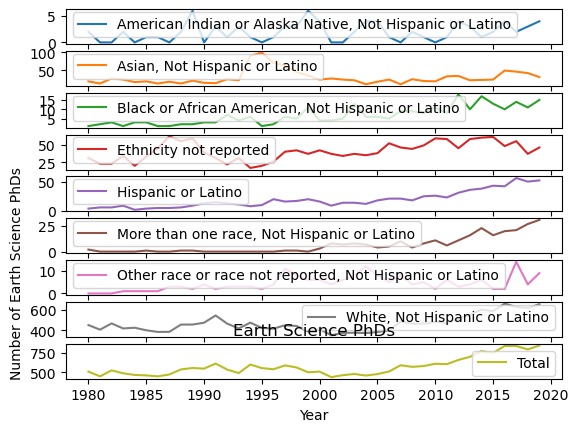

In [96]:
earth_sci_gender_totals = earth_sci_s.transpose()
earth_sci_gender_totals['Total'] = earth_sci_gender_totals.sum(axis = 1)
# earth_sci_gender_totals
earth_sci_gender_totals.plot(subplots=True)
plt.ylabel('Number of Earth Science PhDs', loc = 'bottom')
plt.title('Earth Science PhDs', loc = 'center')
plt.show()

### 2.4 Bring in the Census!
While the numbers above may be concerning on their own, it is important to think about them in the context of the total demographic makeup of the U.S., otherwise we won't know if the geo/atmo/ocean sciences PhD demographics are reflective of that. To do that, I've provided demographic data for the entire U.S. population from the [U.S. Census](https://www.census.gov/data/datasets.html) from 2000-2019, which you'll read in below. Keep in mind that the years in between the actual census years (2000, 2010, etc) are estimates, and as a result, you'll see jumps in the data where the estimates from the year before the census don't align particularly well with the results from the actual census.

The datasets I used to create the 2000-2019 data are the following:
1. [National Intercensal Datasets: 2000-2010](https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-national.html)
2. [National Population by Characteristics: 2010-2019](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-national-detail.html#par_textimage_57373479)

#### 2.4.1 Read in census_2000_2019.csv
Set the `index_col` argument to be the first column.<br> Familiarize yourself with the data, i.e., do you have a general sense of what the columns in the dataframe represent?<br>
Some acronyms that might be helpful:
1. AIAN=American Indian or Alaska Native
2. NHPI=Native Hawaiian and other Pacific Islander

In [97]:
cen = pd.read_csv('census_2000_2019.csv', index_col = 0)
cen

,White,Black,AIAN,Asian,NHPI,Two or More Races,Hispanic
2000,195701760,34405800,2101969,10468759,370224,3452022,35661884
2001,195974816,34780280,2119929,10925853,383282,3640702,37144096
2002,196140544,35130060,2136918,11372498,396089,3831467,38617620
2003,196232768,35438252,2152127,11801041,408032,4026293,40049428
2004,196461760,35797600,2169359,12219990,421181,4234033,41501376
2005,196620976,36147348,2186123,12657844,434180,4446507,43023616
2006,196832704,36520960,2203091,13097737,447629,4671492,44606304
2007,197011392,36905760,2220301,13526680,460973,4909248,46196852
2008,197183536,37290708,2237304,13955911,474526,5158196,47793784
2009,197274544,37656592,2252408,14361474,487588,5411429,49327488


#### 2.4.2 Add a total population column
Add a new column to your dataframe that shows the total U.S. population over time

In [98]:
cen['Total'] = cen.sum(axis = 1)
cen

,White,Black,AIAN,Asian,NHPI,Two or More Races,Hispanic,Total
2000,195701760,34405800,2101969,10468759,370224,3452022,35661884,282162418
2001,195974816,34780280,2119929,10925853,383282,3640702,37144096,284968958
2002,196140544,35130060,2136918,11372498,396089,3831467,38617620,287625196
2003,196232768,35438252,2152127,11801041,408032,4026293,40049428,290107941
2004,196461760,35797600,2169359,12219990,421181,4234033,41501376,292805299
2005,196620976,36147348,2186123,12657844,434180,4446507,43023616,295516594
2006,196832704,36520960,2203091,13097737,447629,4671492,44606304,298379917
2007,197011392,36905760,2220301,13526680,460973,4909248,46196852,301231206
2008,197183536,37290708,2237304,13955911,474526,5158196,47793784,304093965
2009,197274544,37656592,2252408,14361474,487588,5411429,49327488,306771523


#### 2.4.3 Compare your doctorate data to the census data
Make a multi-panel set of line plots showing the percentages of doctorates in each 'race and ethnicity' category relative to the total number of doctorates over time. Plot one 'race and ethnicity' category per panel. Using the census data, add a second line to each panel showing the percentage of each 'race and ethnicity' category relative to the total U.S. population over time. Try using a loop to automate the plotting--i.e., loop over your 'race and ethnicity' categories. You should have a total of 6 subplots (see note below).

><b><font color='red'>Note:</font></b> In the census data, there is no clean analog to the doctorate data's 'ethnicity not reported' category, so do not make a plot for this (the 'Other race or race not reported, Not Hispanic or Latino' category from the doctorate data would be the closest). The same goes for the census 'NHPI' category.
    
Which doctorate 'race and ethnicity' categories seem to reflect the U.S. demographics? Which do not?

In [157]:
aian_phd = earth_sci_gender_totals['American Indian or Alaska Native, Not Hispanic or Latino']/earth_sci_gender_totals['Total']*100
asian_phd = earth_sci_gender_totals['Asian, Not Hispanic or Latino']/earth_sci_gender_totals['Total']*100
black_phd = earth_sci_gender_totals['Black or African American, Not Hispanic or Latino']/earth_sci_gender_totals['Total']*100
hispanic_phd = earth_sci_gender_totals['Hispanic or Latino']/earth_sci_gender_totals['Total']*100
more_phd = earth_sci_gender_totals['More than one race, Not Hispanic or Latino']/earth_sci_gender_totals['Total']*100
white_phd = earth_sci_gender_totals['White, Not Hispanic or Latino']/earth_sci_gender_totals['Total']*100

aian_cen = cen['AIAN']/cen['Total']*100
asian_cen = cen['Asian']/cen['Total']*100
black_cen = cen['Black']/cen['Total']*100
hispanic_cen = cen['Hispanic']/cen['Total']*100
more_cen = cen['Two or More Races']/cen['Total']*100
white_cen = cen['White']/cen['Total']*100

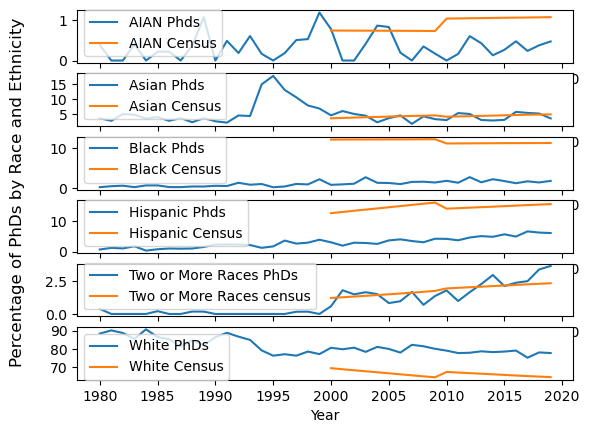

In [156]:
fig, axs = plt.subplots(6, 1)
# plt.setp(axs, xlim = (2000, 2020))
#Plot data on each subplot

axs[0].plot(aian_phd)
axs[0].plot(aian_cen)
axs[0].legend(('AIAN Phds','AIAN Census'))

axs[1].plot(asian_phd)
axs[1].plot(asian_cen)
axs[1].legend(('Asian Phds','Asian Census'))

axs[2].plot(black_phd)
axs[2].plot(black_cen)
axs[2].legend(('Black Phds','Black Census'))

axs[3].plot(hispanic_phd)
axs[3].plot(hispanic_cen)
axs[3].legend(('Hispanic Phds','Hispanic Census'))

axs[4].plot(more_phd)
axs[4].plot(more_cen)
axs[4].legend(('Two or More Races PhDs','Two or More Races census'))

axs[5].plot(white_phd)
axs[5].plot(white_cen)
axs[5].legend(('White PhDs','White Census'))

fig.supylabel('Percentage of PhDs by Race and Ethnicity')
plt.xlabel('Year')
plt.show()

The Asian and Two or More Racesor Ethnicities seem to best reflect the US demographics while the community of Black PhDs seems to have a rather large disparity.